In [2]:
import pandas as pd

!pip install prophet
from prophet import Prophet



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Hourly price

data_2023 = [pd.read_csv(f"Data/messari_hourly_prices/hourly_prices_2023_{i}.csv", parse_dates=["datetime"]) for i in range(1, 13)]
data_2024 = [pd.read_csv(f"Data/messari_hourly_prices/hourly_prices_2024_{i}.csv", parse_dates=["datetime"]) for i in range(1, 13)]
df1 = pd.concat(data_2023 + data_2024).sort_values("datetime").set_index("datetime").drop(columns=["Unnamed: 0"])

df1 = df1.reset_index()
df1_btc = df1[df1['reserve_name']=='Wrapped BTC']

# Reserves features

data2_2023 = [pd.read_csv(f"Data/reserves_features/reserves_history_hourly_completed_2023-{i}.csv") for i in range(1, 13)]
data2_2024 = [pd.read_csv(f"Data/reserves_features/reserves_history_hourly_completed_2024-{i}.csv") for i in range(1, 13)]
dfr = pd.concat(data2_2023 + data2_2024).drop(columns=["Unnamed: 0"])

dfr_btc = dfr[dfr['reserve_name']=='Wrapped BTC'].dropna().drop(["totalPrincipalStableDebt"], axis=1)

# Merge

dfr_btc['regular_datetime'] = pd.to_datetime(dfr_btc['regular_datetime'], utc=True)
df_btc = pd.merge(df1_btc, dfr_btc, left_on='datetime', right_on='regular_datetime')
df_btc = df_btc.drop(['blockNumber', 'timestamp_hours', 'id', 'snapshot_timestamp', 
'regular_datetime', 'reserve_name_x', 'reserve_name_y', 'reserve_pool', 'protocol', 'protocol_name', 
'priceInUsd', 'outputTokenPriceUSD', 'averageStableBorrowRate', 'priceInEth', 'reserve_decimals'], axis=1)

df_btc = df_btc.sort_values("datetime").set_index("datetime")
df_btc

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,timestamp,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,true_value
datetime,,,,,,,,,,,,,,,
2023-01-27 12:00:00+00:00,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,1.674823e+09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,1.0
2023-01-27 13:00:00+00:00,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,1.674827e+09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000,1.0
2023-01-27 14:00:00+00:00,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,1.674829e+09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000,1.0
2023-01-27 15:00:00+00:00,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,1.674834e+09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000,1.0
2023-01-27 16:00:00+00:00,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,1.674837e+09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00+00:00,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,1.735675e+09,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809,1.0
2024-12-31 20:00:00+00:00,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,1.735677e+09,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825,1.0
2024-12-31 21:00:00+00:00,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,1.735681e+09,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823,1.0


In [48]:
m = Prophet()

df = df_btc.reset_index().rename(columns={'datetime': 'ds', 'inputTokenPriceUSD': 'y'})
regressors = ['accruedToTreasury','availableLiquidity', 'liquidityIndex', 'liquidityRate',
'stableBorrowRate', 'totalATokenSupply','totalCurrentVariableDebt', 
'totalLiquidity', 'totalScaledVariableDebt','utilizationRate', 'variableBorrowIndex', 
'variableBorrowRate']

df['ds'] = df['ds'].dt.tz_localize(None)

for col in regressors:
    m.add_regressor(col)

df


,ds,y,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,timestamp,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,true_value
0,2023-01-27 12:00:00,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,1.674823e+09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,1.0
1,2023-01-27 13:00:00,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,1.674827e+09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000,1.0
2,2023-01-27 14:00:00,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,1.674829e+09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000,1.0
3,2023-01-27 15:00:00,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,1.674834e+09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000,1.0
4,2023-01-27 16:00:00,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,1.674837e+09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,2024-12-31 19:00:00,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,1.735675e+09,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809,1.0
14019,2024-12-31 20:00:00,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,1.735677e+09,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825,1.0
14020,2024-12-31 21:00:00,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,1.735681e+09,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823,1.0
14021,2024-12-31 22:00:00,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,1.735686e+09,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851,1.0


In [49]:
m.fit(df)
# future = m.make_future_dataframe(periods=30)

# for col in regressors:
#     if col in df.columns:
#         future[col] = df[col].iloc[-1]  # Use the last known value or forecast the future value
#     else:
#         future[col] = None

future = df[['ds'] + regressors]  # include future values for all regressors

forecast = m.predict(future)

14:58:01 - cmdstanpy - INFO - Chain [1] start processing
14:58:28 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
print(forecast)

                       ds          trend    yhat_lower    yhat_upper  \
0     2023-01-27 12:00:00  -34673.142587  20235.658551  26437.152929   
1     2023-01-27 13:00:00  -34665.454079  19903.351134  26205.236470   
2     2023-01-27 14:00:00  -34657.765570  20061.562535  26121.879116   
3     2023-01-27 15:00:00  -34650.077062  20142.060906  26433.034127   
4     2023-01-27 16:00:00  -34642.388554  20331.638854  26342.180416   
...                   ...            ...           ...           ...   
14018 2024-12-31 19:00:00  131519.561595  92161.287373  98672.974502   
14019 2024-12-31 20:00:00  131540.062473  92498.111334  98657.309948   
14020 2024-12-31 21:00:00  131560.563351  92689.263986  98894.611828   
14021 2024-12-31 22:00:00  131581.064229  92857.254880  99209.467522   
14022 2024-12-31 23:00:00  131601.565107  92587.834687  99078.628406   

         trend_lower    trend_upper  accruedToTreasury  \
0      -34673.142587  -34673.142587         -59.945594   
1      -34665.45407

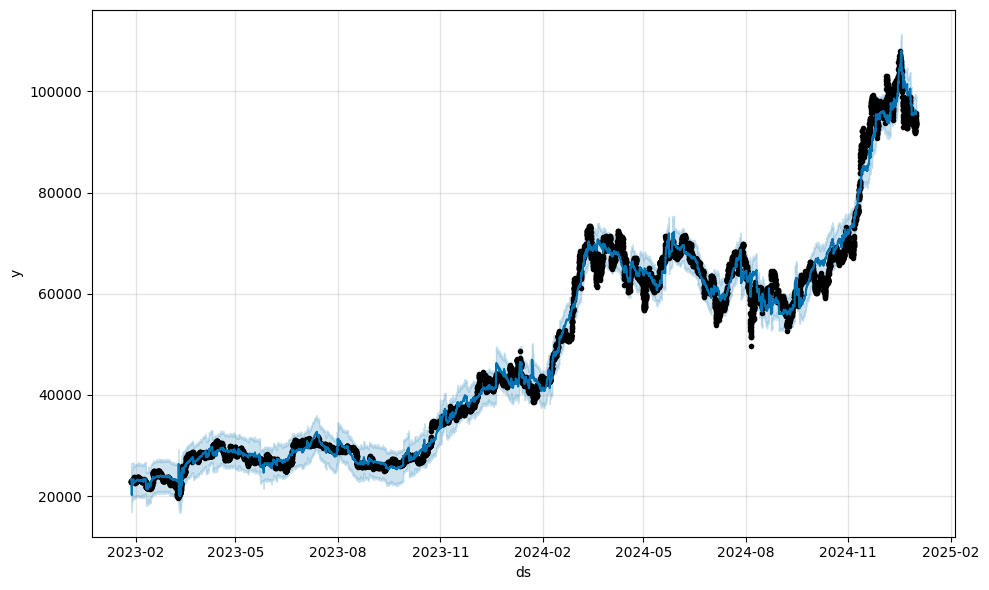

In [51]:
import matplotlib.pyplot as plt

m.plot(forecast)
plt.show()

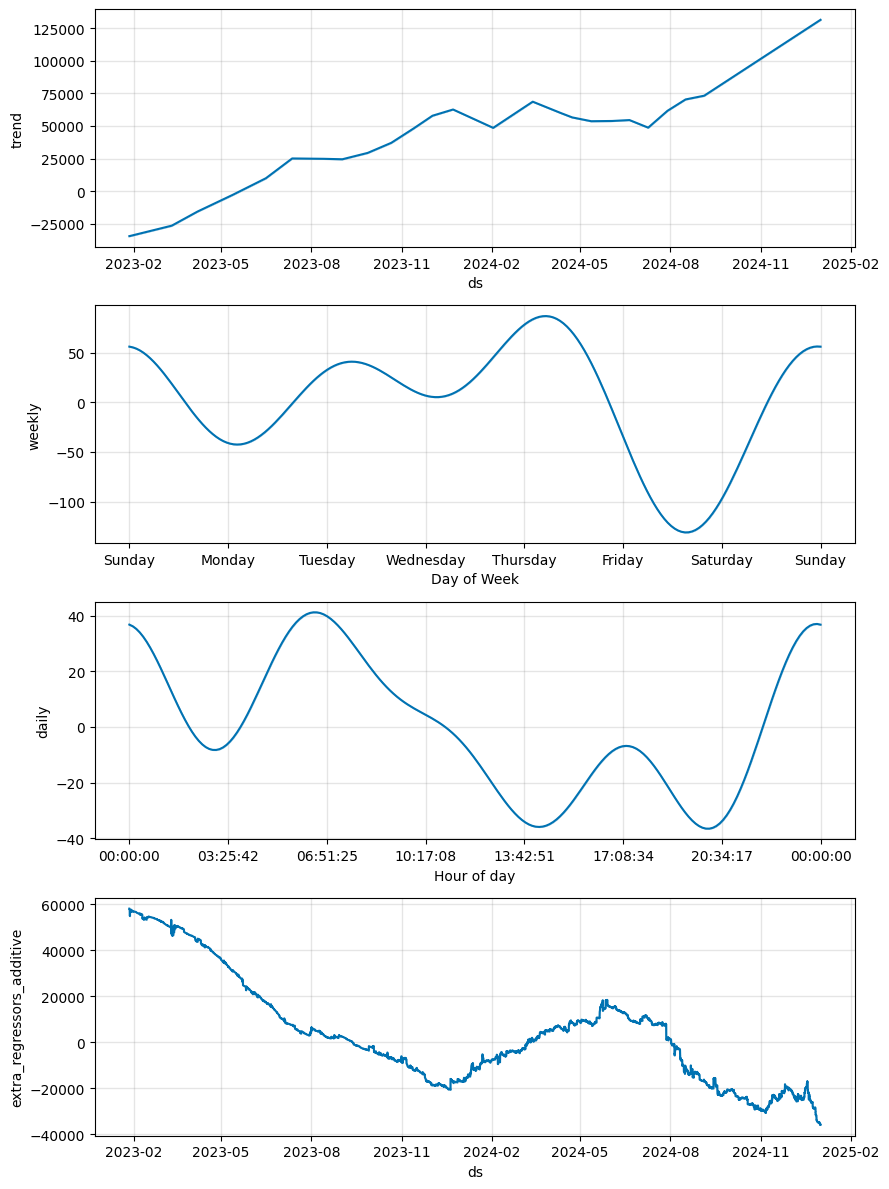

In [52]:
m.plot_components(forecast)
plt.show()

In [ ]:
# Performance evaluation

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Merge actual and predicted values on the 'ds' column
merged = df[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='inner')

mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(merged['y'], merged['yhat'])

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 6049151.2492
Root Mean Squared Error: 2459.5022
R-squared: 0.9865


In [54]:
df.describe()

,ds,y,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,timestamp,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,true_value
count,14023,14023.000000,14023.000000,14023.000000,14023.000000,14023.000000,14023.000000,1.402300e+04,14023.000000,14023.000000,14023.000000,14023.000000,14023.000000,14023.000000,14023.000000,14023.000000
mean,2024-02-22 00:49:45.666405120,51895.267659,0.049107,19745.662603,1.001977,0.001060,0.060843,1.708566e+09,22086.285673,2332.377281,22051.451514,2296.082786,0.110524,1.012979,0.010346,0.999857
min,2023-01-27 12:00:00,19645.922306,0.000000,0.619864,1.000000,0.000000,0.000000,1.674823e+09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2023-09-21 15:30:00,29978.436912,0.012098,8810.337769,1.001342,0.000473,0.000000,1.695312e+09,9960.990384,1151.428738,9953.752825,1141.425963,0.084599,1.009095,0.007736,1.000000
50%,2024-03-06 03:00:00,56359.865642,0.029957,20365.090898,1.001904,0.000801,0.076356,1.709697e+09,22897.161929,2434.490507,22880.663103,2402.886951,0.105189,1.013513,0.009549,1.000000
75%,2024-08-05 15:30:00,66263.001857,0.065839,30122.914472,1.002964,0.001208,0.081829,1.722875e+09,34452.040193,3410.535122,34385.467321,3359.291841,0.121389,1.018089,0.011634,1.000000
max,2024-12-31 23:00:00,107937.001220,0.319026,37156.678312,1.003206,0.013064,0.140401,1.735689e+09,39973.530536,4901.009686,39892.520231,4818.971024,0.366186,1.021041,0.050401,1.000000
std,NaN,21154.250577,0.054427,11813.301235,0.000911,0.001160,0.037838,1.670862e+07,13036.031536,1394.962590,13007.174334,1368.083802,0.044907,0.005748,0.004631,0.011942


In [79]:
import pandas as pd

# Get the names of all regressors (including Prophet's internal ones)
regressor_names = m.train_component_cols

# Filter for your custom regressors
custom_regressors = ['liquidityRate', 'utilizationRate']  # Your 12 variables
custom_betas = [m.params['beta'][0, i] for i, name in enumerate(regressor_names) if name in custom_regressors]

print(custom_betas)  # List of 12 coefficients

# # Create a DataFrame of all coefficients
# coeffs = pd.DataFrame({
#     'component': list(m.train_component_cols.keys()),
#     'beta': m.params['beta'][0]
# })
# print(coeffs)



[np.float64(0.000222773), np.float64(-4.71026e-05)]
